<a href="https://colab.research.google.com/github/afreenkhan0808/aichallenge/blob/main/Customer_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 1.68 ms (started: 2024-09-30 21:22:39 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airline_customer_satisfaction.csv to Airline_customer_satisfaction.csv
time: 2min 42s (started: 2024-09-30 21:24:58 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import the machine learning models you might use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive

time: 866 µs (started: 2024-09-30 21:29:13 +00:00)


In [ ]:
data = pd.read_csv('Airline_customer_satisfaction.csv',header='infer')


time: 407 ms (started: 2024-09-30 21:32:44 +00:00)


<ipython-input-7-f0cb98dfdbd2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-7-f0cb98dfdbd2>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


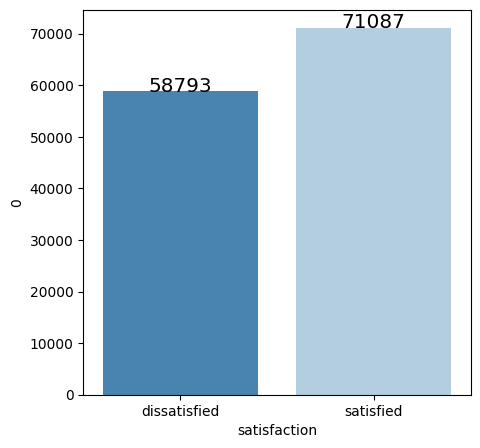

time: 444 ms (started: 2024-09-30 21:32:01 +00:00)


In [ ]:
#Calculating Satisfied and Dissatisfied cases
plt.figure(figsize=(5,5))
target_group = data.groupby('satisfaction').size().reset_index()
pal = sns.color_palette("Blues", len(target_group))
rank = target_group["satisfaction"].argsort().argsort()
g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['satisfaction'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


time: 37.7 ms (started: 2024-09-30 21:32:24 +00:00)


In [ ]:
columns_to_drop = ['Age']
data = data.drop(columns_to_drop,axis=1)
data.head()

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,0,3,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,0,0,3,2,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,0,0,3,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,0,0,3,4,...,4,2,2,0,2,4,2,5,0,0.0


time: 43.6 ms (started: 2024-09-30 21:39:18 +00:00)


In [ ]:
data.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


time: 8.73 ms (started: 2024-09-30 21:36:03 +00:00)


In [ ]:
# Count occurrences of zeros in each column
zero_counts = (data == 0).sum()
print(zero_counts)


satisfaction                             0
Customer Type                            0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Seat comfort                          4797
Departure/Arrival time convenient     6664
Food and drink                        5945
Gate location                            2
Inflight wifi service                  132
Inflight entertainment                2978
Online support                           1
Ease of Online booking                  18
On-board service                         5
Leg room service                       444
Baggage handling                         0
Checkin service                          1
Cleanliness                              5
Online boarding                         14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             72753
dtype: int64
time: 51.7 ms (started: 2024-09-30 21:39:29 +00:00)


In [16]:
data.isna().sum()

,0
satisfaction,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,4797
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,132


time: 270 ms (started: 2024-09-30 21:49:54 +00:00)


In [17]:
data['Seat comfort'] = data['Seat comfort'].fillna(data['Seat comfort'].median())
data['Inflight wifi service'] = data['Inflight wifi service'].fillna(data['Inflight wifi service'].median())
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())


time: 520 ms (started: 2024-09-30 21:53:09 +00:00)


In [18]:
# Numerical columns from dataset
numerical_cols = ['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                  'Food and drink', 'Inflight wifi service', 'Inflight entertainment',
                  'Online support', 'Ease of Online booking', 'On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service',
                  'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
                  'Arrival Delay in Minutes']

# Categorical columns from dataset
categorical_cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']


time: 1.11 ms (started: 2024-09-30 21:54:15 +00:00)


In [19]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265           3.0                                  0   
1             2464           3.0                                  0   
2             2138           3.0                                  0   
3              623           3.0                                  0   
4              354           3.0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                    2.0   
1               0              3                    3.0   
2               0              3                    2.0   
3               0              3                    3.0   
4               0              3                    4.0   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2          

In [20]:
data_encoded.dtypes

,0
Flight Distance,int64
Seat comfort,float64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64
Inflight wifi service,float64
Inflight entertainment,int64
Online support,int64
Ease of Online booking,int64
On-board service,int64


time: 9.68 ms (started: 2024-09-30 21:56:00 +00:00)


In [21]:
# Convert boolean columns to integers (0 and 1)
data_encoded = data_encoded.astype(int)
print(data_encoded.dtypes)

Flight Distance                      int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction_dissatisfied            int64
satisfaction_satisfied               int64
Customer Type_Loyal Customer         int64
Customer Type_disloyal Customer      int64
Type of Travel_Business travel       int64
Type of Travel_Personal Travel       int64
Class_Busin

In [22]:
data.shape

(129880, 21)

time: 5.74 ms (started: 2024-09-30 21:57:28 +00:00)
